* **Name**: Nirvan S.P. Theethira
* **Worked with**: Zach McGrath
* **Email**: nith5605@colorado.edu

# Run Details

## UDP
* All UDP code and excecutable files should be in the `/udp` folder.
* **Client**:
* To run the UDP client use the following command: `./client <server_address> <save_file_name>`
* `server address` is the IP address of the server to query for time. It will be `0` for local machine.
* `save_file_name` is the file name to save timing data to. It will look something like `udp_output.txt`
* Sample run: `./client 0 udp_output.txt` or `./client 1.160.10.240 udp_output.txt`
* **Server**:
* To run the UDP server use the following command: `./server`

## RPC
* All RPC code and excecutable files should be in the `/rpc` folder.
* **Client:**
* To run the RPC client use the following command: `./clock_client <server_address> <save_file_name>`
* `server address` is the IP address of the server to query for time. It will be `localhost` for local machine.
* `save_file_name` is the file name to save timing data to. It will look something like `rpc_output.txt`
* Sample run: `./clock_client localhost udp_output.txt` or `./clock_client 1.160.10.240 udp_output.txt`
* **Server:**
* To run the RPC server, use the following command: `./clock_server`

# Collect Data

In [1]:
import numpy as np
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt

udp_sameM = pd.read_csv("udp/udp_sameMachine.txt",sep=',',header=0) 
rpc_sameM = pd.read_csv("rpc/rpc_sameMachine.txt",sep=',',header=0)

udp_diffM_sameN = pd.read_csv("udp/udp_diffMachine_sameNetwork.txt",sep=',',header=0) 
rpc_diffM_sameN = pd.read_csv("rpc/rpc_diffMachine_sameNetwork.txt",sep=',',header=0)

udp_diffM_diffN = pd.read_csv("udp/udp_diffMachine_diffNetwork.txt",sep=',',header=0) 
rpc_diffM_diffN = pd.read_csv("rpc/rpc_diffMachine_diffNetwork.txt",sep=',',header=0)

# Question 1

In [2]:
def getLatencies(dataFrame):
    latencies = []
    for _,step in dataFrame.iterrows():
        clientSend = datetime.strptime(step['Client_Send'], '%H:%M:%S.%f')
        clientReceive = datetime.strptime(step['Client_Receive'], '%H:%M:%S.%f')
        latencie = clientReceive - clientSend
        latencies.append(latencie.total_seconds())
    return np.array(latencies)*10**3

In [3]:
# same machine
udp_sameM_latencies = getLatencies(udp_sameM)
rpc_sameM_latencies = getLatencies(rpc_sameM)

# Different machine same network
udp_diffM_sameN_latencies = getLatencies(udp_diffM_sameN)
rpc_diffM_sameN_latencies = getLatencies(rpc_diffM_sameN)


# Different machine different network
udp_diffM_diffN_latencies = getLatencies(udp_diffM_diffN)
rpc_diffM_diffN_latencies = getLatencies(rpc_diffM_diffN)

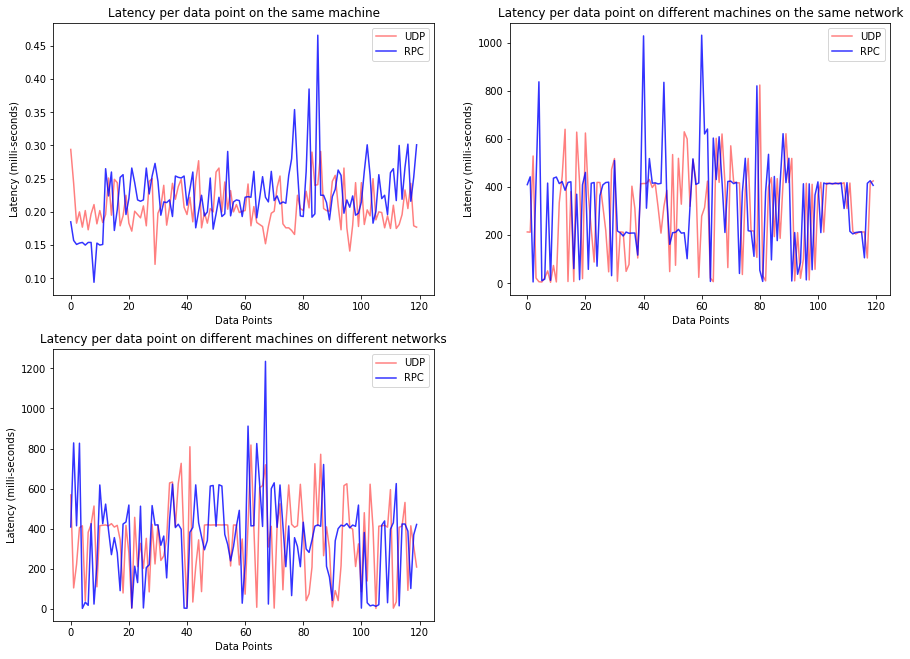

In [4]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(range(len(udp_sameM_latencies)), udp_sameM_latencies, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_sameM_latencies)), rpc_sameM_latencies, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Latency (milli-seconds)')
plt.title('Latency per data point on the same machine')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(range(len(udp_diffM_sameN_latencies)), udp_diffM_sameN_latencies, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_sameN_latencies)), rpc_diffM_sameN_latencies, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Latency (milli-seconds)')
plt.title('Latency per data point on different machines on the same network')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.plot(range(len(udp_diffM_diffN_latencies)), udp_diffM_diffN_latencies, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_diffN_latencies)), rpc_diffM_diffN_latencies, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Latency (milli-seconds)')
plt.title('Latency per data point on different machines on different networks')
plt.legend(loc="upper right")

plt.show()

In [5]:
print("UDP on the same machine:")
print("\tAverage Latency: {} milli-seconds"
      .format(round(np.mean(udp_sameM_latencies),3)))
print("\tStandard Deviation across Latencies: {} milli-seconds"
      .format(round(np.std(udp_sameM_latencies),3)))

print("\nRPC on the same machine:")
print("\tAverage Latency: {} milli-seconds"
      .format(round(np.mean(rpc_sameM_latencies),3)))
print("\tStandard Deviation across Latencies: {} milli-seconds"
      .format(round(np.std(rpc_sameM_latencies),3)))

print("\nUDP on different machines on the same network:")
print("\tAverage Latency: {} milli-seconds"
      .format(round(np.mean(udp_diffM_sameN_latencies),3)))
print("\tStandard Deviation across Latencies: {} milli-seconds"
      .format(round(np.std(udp_diffM_sameN_latencies),3)))

print("\nRPC on different machines on the same network:")
print("\tAverage Latency: {} milli-seconds"
      .format(round(np.mean(rpc_diffM_sameN_latencies),3)))
print("\tStandard Deviation across Latencies: {} milli-seconds"
      .format(round(np.std(rpc_diffM_sameN_latencies),3)))

print("\nUDP on different machines on different networks:")
print("\tAverage Latency: {} milli-seconds"
      .format(round(np.mean(udp_diffM_diffN_latencies),3)))
print("\tStandard Deviation across Latencies: {} milli-seconds"
      .format(round(np.std(udp_diffM_diffN_latencies),3)))

print("\nRPC on different machines on different networks:")
print("\tAverage Latency: {} milli-seconds"
      .format(round(np.mean(rpc_diffM_diffN_latencies),3)))
print("\tStandard Deviation across Latencies: {} milli-seconds"
      .format(round(np.std(rpc_diffM_diffN_latencies),3)))

UDP on the same machine:
	Average Latency: 0.208 milli-seconds
	Standard Deviation across Latencies: 0.032 milli-seconds

RPC on the same machine:
	Average Latency: 0.225 milli-seconds
	Standard Deviation across Latencies: 0.047 milli-seconds

UDP on different machines on the same network:
	Average Latency: 297.527 milli-seconds
	Standard Deviation across Latencies: 193.554 milli-seconds

RPC on different machines on the same network:
	Average Latency: 334.391 milli-seconds
	Standard Deviation across Latencies: 203.603 milli-seconds

UDP on different machines on different networks:
	Average Latency: 352.36 milli-seconds
	Standard Deviation across Latencies: 194.321 milli-seconds

RPC on different machines on different networks:
	Average Latency: 357.957 milli-seconds
	Standard Deviation across Latencies: 218.667 milli-seconds


## Analysis
* There is a variation in latencies as both the UDP and RPC client-server use UDP for communication. As UDP is unreliable and some packets can take more time than others depending on how they are rounted, there is a variation in latencies at each data point.
* UDP client server implementation will be more accurate as RPC incurs higher latency as discussed in question 2.
* It should be noted that there is a spike (irregularity in latency) in the first UDP reading taking on different machines on different networks.

# Question 2

* In the **same machine** scenario RPC has average latency that is 0.015 milli-seconds more that UDP. This is expected as RPC incurs overhead due to marshaling of data during communication.
* In the **different machine same network** scenario RPC has average latency that is 36.86 milli-seconds more that UDP. This is expected as RPC incurs overhead due to marshaling of data during communication.
* In the **different machine different network** scenario UDP has average latency that is 5.59 milli-seconds more that RPC. This is unexpected as RPC has to incur a higher overhead than UDP due to marshaling of data during communication. This is probably due the spike or irregularity in the first data point collected. This can be seen in the graph. Baring this one irregular data point, RPC would have had higger average latency than UDP as expected.
* When simulating different networks, both machines were still in the same continent (in boulder). This is the reason for the latencies for different networks being not that much more than latencies on the same network.

# Question 3

In [6]:
def offset_delays(dataFrame):
    delays = []
    offsets = []
    for _,step in dataFrame.iterrows():
        ti_3 = datetime.strptime(step['Client_Send'], '%H:%M:%S.%f')
        ti_2 = datetime.strptime(step['Server_Receive'], '%H:%M:%S.%f')
        ti_1 = datetime.strptime(step['Server_Send'], '%H:%M:%S.%f')
        ti_0 = datetime.strptime(step['Client_Receive'], '%H:%M:%S.%f')
        delay = (ti_2 - ti_3) + (ti_0 - ti_1)
        offset = ((ti_2 - ti_3) - (ti_0 - ti_1))/2.0
        delays.append(delay.total_seconds())
        offsets.append(offset.total_seconds())
    return np.array(delays)*10**6, np.array(offsets)*10**3

In [7]:
udp_sameM_delay, udp_sameM_offset = offset_delays(udp_sameM)
rpc_sameM_delay, rpc_sameM_offset = offset_delays(rpc_sameM)

udp_diffM_sameN_delay, udp_diffM_sameN_offset = offset_delays(udp_diffM_sameN)
rpc_diffM_sameN_delay, rpc_diffM_sameN_offset = offset_delays(rpc_diffM_sameN)

udp_diffM_diffN_delay, udp_diffM_diffN_offset = offset_delays(udp_diffM_diffN)
rpc_diffM_diffN_delay, rpc_diffM_diffN_offset = offset_delays(rpc_diffM_diffN)

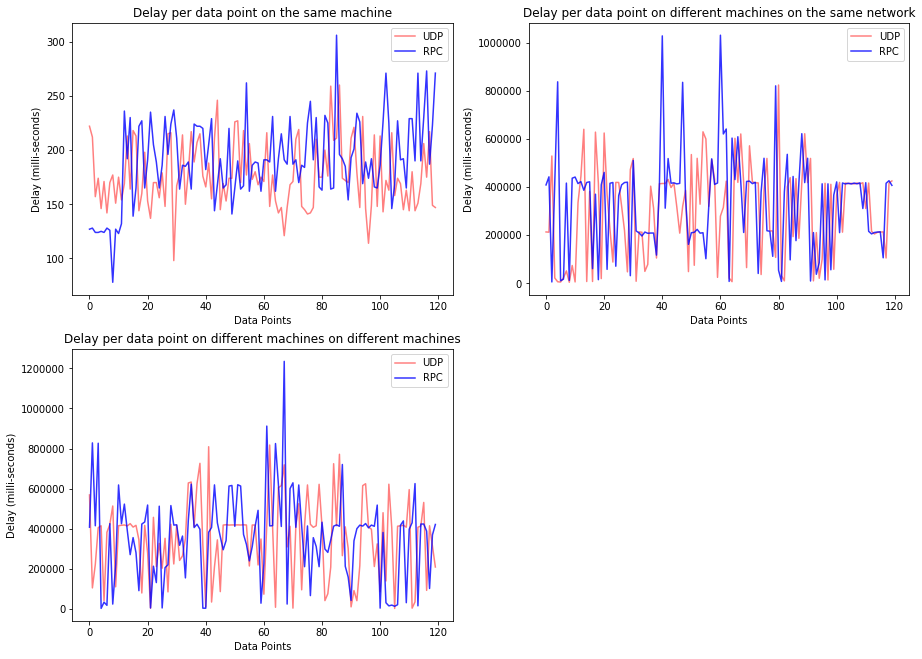

In [8]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(range(len(udp_sameM_delay)), udp_sameM_delay, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_sameM_delay)), rpc_sameM_delay, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Delay (milli-seconds)')
plt.title('Delay per data point on the same machine')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(range(len(udp_diffM_sameN_delay)), udp_diffM_sameN_delay, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_sameN_delay)), rpc_diffM_sameN_delay, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Delay (milli-seconds)')
plt.title('Delay per data point on different machines on the same network')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.plot(range(len(udp_diffM_diffN_delay)), udp_diffM_diffN_delay, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_diffN_delay)), rpc_diffM_diffN_delay, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Delay (milli-seconds)')
plt.title('Delay per data point on different machines on different machines')
plt.legend(loc="upper right")

plt.show()

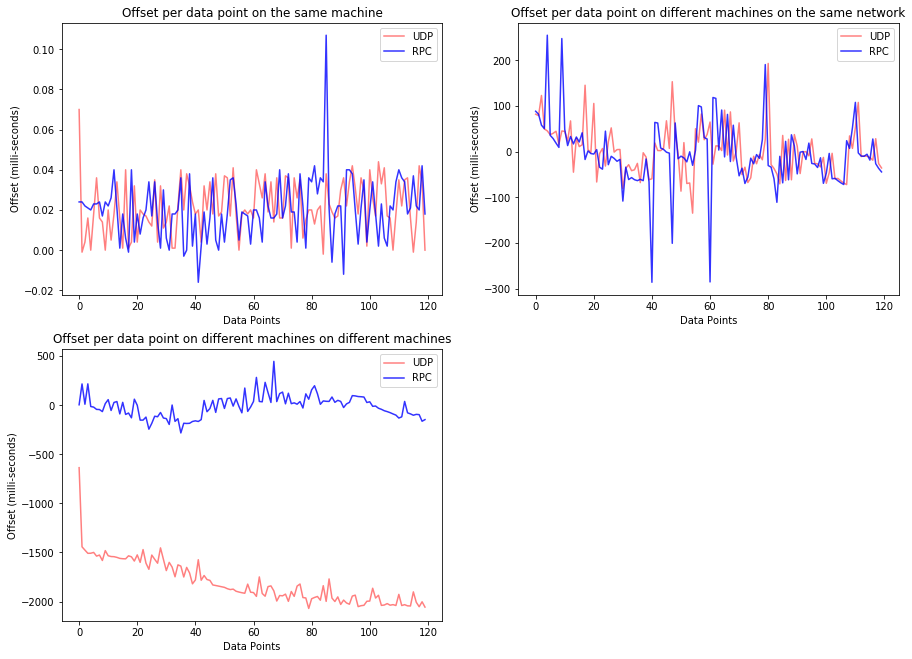

In [9]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(range(len(udp_sameM_offset)), udp_sameM_offset, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_sameM_offset)), rpc_sameM_offset, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Offset (milli-seconds)')
plt.title('Offset per data point on the same machine')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(range(len(udp_diffM_sameN_offset)), udp_diffM_sameN_offset, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_sameN_offset)), rpc_diffM_sameN_offset, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Offset (milli-seconds)')
plt.title('Offset per data point on different machines on the same network')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.plot(range(len(udp_diffM_diffN_offset)), udp_diffM_diffN_offset, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_diffN_offset)), rpc_diffM_diffN_offset, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Offset (milli-seconds)')
plt.title('Offset per data point on different machines on different machines')
plt.legend(loc="upper right")

plt.show()

* From the graphs we see that RPC has more drastic non-symmetric spikes than UDP.
* From the above observation we can concur that the more symmetric the round trip time (as in UDP) the more accurately current time can be estimated. 
* In the different machine different network scenario, it is interesting to see how UDP has a large offset(in the negative direction). This is because there was a large disparity in clock times between server and client at the time the data was collected. This reflects aptly in the data collected.

# Question 4

In [16]:
def crisDiff(dataFrame):
    diffs = []
    for _,step in dataFrame.iterrows():
        ti_3 = datetime.strptime(step['Client_Send'], '%H:%M:%S.%f')
        ti_2 = datetime.strptime(step['Server_Receive'], '%H:%M:%S.%f')
        ti_1 = datetime.strptime(step['Server_Send'], '%H:%M:%S.%f')
        ti_0 = datetime.strptime(step['Client_Receive'], '%H:%M:%S.%f')
        t_new = ti_2 + (ti_0 - ti_3)/2.0
        diff = abs(t_new-ti_0)
        diffs.append(diff.total_seconds())
    return np.array(diffs)*10**3

In [17]:
udp_sameM_diff = crisDiff(udp_sameM)
rpc_sameM_diff = crisDiff(rpc_sameM)

udp_diffM_sameN_diff = crisDiff(udp_diffM_sameN)
rpc_diffM_sameN_diff = crisDiff(rpc_diffM_sameN)

udp_diffM_diffN_diff = crisDiff(udp_diffM_diffN)
rpc_diffM_diffN_diff = crisDiff(rpc_diffM_diffN)

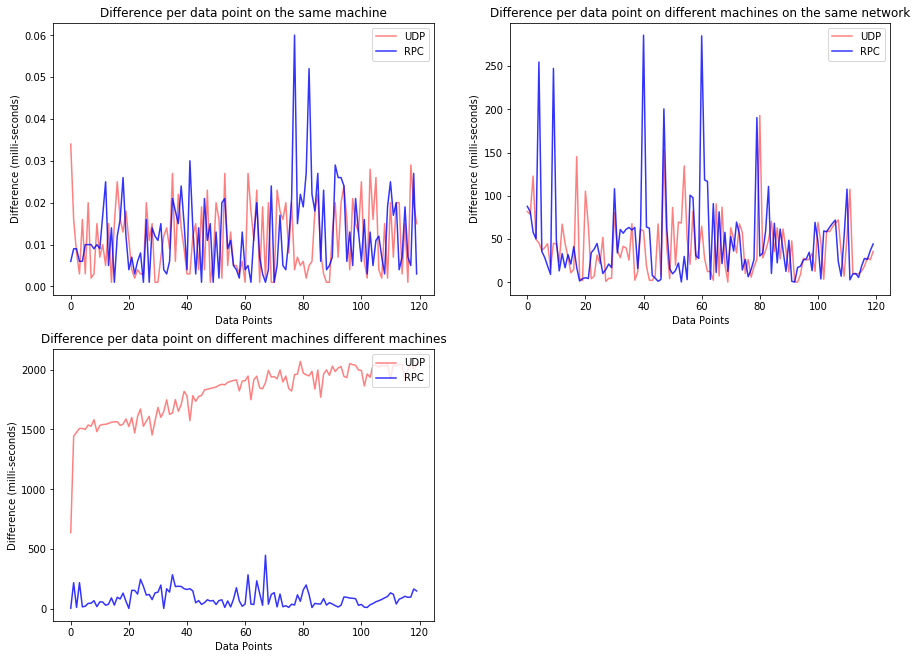

In [18]:
fig = plt.figure()
fig.set_figheight(11)
fig.set_figwidth(15)

plt.subplot(2, 2, 1)
plt.plot(range(len(udp_sameM_diff)), udp_sameM_diff, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_sameM_diff)), rpc_sameM_diff, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Difference (milli-seconds)')
plt.title('Difference per data point on the same machine')
plt.legend(loc="upper right")

plt.subplot(2, 2, 2)
plt.plot(range(len(udp_diffM_sameN_diff)), udp_diffM_sameN_diff, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_sameN_diff)), rpc_diffM_sameN_diff, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Difference (milli-seconds)')
plt.title('Difference per data point on different machines on the same network')
plt.legend(loc="upper right")

plt.subplot(2, 2, 3)
plt.plot(range(len(udp_diffM_diffN_diff)), udp_diffM_diffN_diff, alpha=0.5, color='r', label='UDP')
plt.plot(range(len(rpc_diffM_diffN_diff)), rpc_diffM_diffN_diff, alpha=0.8, color='b', label='RPC')
plt.xlabel('Data Points')
plt.ylabel('Difference (milli-seconds)')
plt.title('Difference per data point on different machines different machines')
plt.legend(loc="upper right")

plt.show()

In [21]:
def avgErrorBounds(dataFrame):
    diffs = []
    latencies = []
    for _,step in dataFrame.iterrows():
        ti_3 = datetime.strptime(step['Client_Send'], '%H:%M:%S.%f')
        ti_2 = datetime.strptime(step['Server_Receive'], '%H:%M:%S.%f')
        ti_1 = datetime.strptime(step['Server_Send'], '%H:%M:%S.%f')
        ti_0 = datetime.strptime(step['Client_Receive'], '%H:%M:%S.%f')
        t_new = ti_2 + (ti_0 - ti_3)/2.0
        diff = abs(t_new-ti_0)
        diffs.append(diff.total_seconds())
        latencie = (ti_0 - ti_3)/2.0
        latencies.append(latencie.total_seconds())
    minDiff = min(diffs)
    errorBound = np.mean((np.array(latencies) - minDiff))
    return round(minDiff*10**3,3), round(errorBound*10**3,3)  

In [29]:
print("UDP on the same machine:")
minDiff,errorBound = avgErrorBounds(udp_sameM)
print("\tAbsolute minimum latency: {} milli-seconds\n\tEstimate error bound:{} milli-seconds"
      .format(minDiff,errorBound))

print("\nRPC on the same machine:")
minDiff,errorBound = avgErrorBounds(rpc_sameM)
print("\tAbsolute minimum latency: {} milli-seconds\n\tEstimate error bound:{} milli-seconds"
      .format(minDiff,errorBound))

print("\nUDP on different machines on the same network:")
minDiff,errorBound = avgErrorBounds(udp_diffM_sameN)
print("\tAbsolute minimum latency: {} milli-seconds\n\tEstimate error bound:{} milli-seconds"
      .format(minDiff,errorBound))

print("\nRPC on different machines on the same network:")
minDiff,errorBound = avgErrorBounds(rpc_diffM_sameN)
print("\tAbsolute minimum latency: {} milli-seconds\n\tEstimate error bound:{} milli-seconds"
      .format(minDiff,errorBound))

print("\nUDP on different machines on different networks:")
minDiff,errorBound = avgErrorBounds(udp_diffM_diffN)
print("\tAbsolute minimum latency: {} milli-seconds\n\tEstimate error bound:{} milli-seconds"
      .format(minDiff,errorBound))

print("\nRPC on different machines on different networks:")
minDiff,errorBound = avgErrorBounds(rpc_diffM_diffN)
print("\tAbsolute minimum latency: {} milli-seconds\n\tEstimate error bound:{} milli-seconds"
      .format(minDiff,errorBound))

UDP on the same machine:
	Absolute minimum latency: 0.001 milli-seconds
	Estimate error bound:0.103 milli-seconds

RPC on the same machine:
	Absolute minimum latency: 0.001 milli-seconds
	Estimate error bound:0.111 milli-seconds

UDP on different machines on the same network:
	Absolute minimum latency: 0.027 milli-seconds
	Estimate error bound:148.737 milli-seconds

RPC on different machines on the same network:
	Absolute minimum latency: 0.273 milli-seconds
	Estimate error bound:166.923 milli-seconds

UDP on different machines on different networks:
	Absolute minimum latency: 636.777 milli-seconds
	Estimate error bound:-460.597 milli-seconds

RPC on different machines on different networks:
	Absolute minimum latency: 0.803 milli-seconds
	Estimate error bound:178.175 milli-seconds
